In [177]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

In [386]:
tweets = pd.read_csv('vaccination_all_tweets.csv')
tweets['date'] = pd.to_datetime(tweets['date']).dt.strftime('%Y%m%d').astype('int')
tweets = tweets[['date', 'id', 'user_location']]
tweets['user_location'] = tweets['user_location'].str.lower() # приводим location к нижнему регистру


In [338]:
vaccins = pd.read_csv('vaccinations.csv')
vaccins['date'] = pd.to_datetime(vaccins['date']).dt.strftime('%Y%m%d').astype('int')
vaccins = vaccins[['date', 'daily_vaccinations', 'location']]
vaccins = vaccins.dropna(subset=['daily_vaccinations'])
vaccins

,date,daily_vaccinations,location
1,20210223,1367.0,Afghanistan
2,20210224,1367.0,Afghanistan
3,20210225,1367.0,Afghanistan
4,20210226,1367.0,Afghanistan
5,20210227,1367.0,Afghanistan
...,...,...,...
43434,20210824,62638.0,Zimbabwe
43435,20210825,67597.0,Zimbabwe
43436,20210826,60688.0,Zimbabwe
43437,20210827,53784.0,Zimbabwe


# ИНДУСЫ

В датасете в твиттами трудно идентифицировать локацию автора твита, потому что данный столбик не стандартизирован (где то тупо город написан, где то город и штат, где то какая то хрень). Я обнаружил что  довольно много индусов, попробуем оценить как влияли твиты индусов на вакцинацию индусов.

In [392]:
tweets_ind= tweets.dropna(subset=['user_location'])
tweets_ind = tweets_ind[tweets_ind['user_location'].str.contains('.*india.*', case=False)]
tweets_ind.head()

,date,id,user_location
12,20201212,1337815730486702087,india
23,20201212,1337773751841144833,"mumbai, india"
51,20201214,1338631874814619653,india | usa
75,20201214,1338574693087936513,india
94,20201214,1338551175587786752,india


In [340]:
tweets_ind = tweets_ind.groupby(['date']).count()
tweets_ind = tweets_ind.rename(columns={'id': 'tweets'})

In [341]:
vaccins_ind = vaccins[vaccins['location']=='India']

In [343]:
indus_df = pd.merge(tweets_ind, vaccins_ind, on='date')
indus_df

,date,tweets,user_location,daily_vaccinations,location
0,20210116,10,10,191181.0,India
1,20210117,10,10,112150.0,India
2,20210118,3,3,151350.0,India
3,20210119,3,3,168709.0,India
4,20210120,2,2,161297.0,India
...,...,...,...,...,...
194,20210824,239,239,4601598.0,India
195,20210825,220,220,5110246.0,India
196,20210826,299,299,5399358.0,India
197,20210827,282,282,6047866.0,India


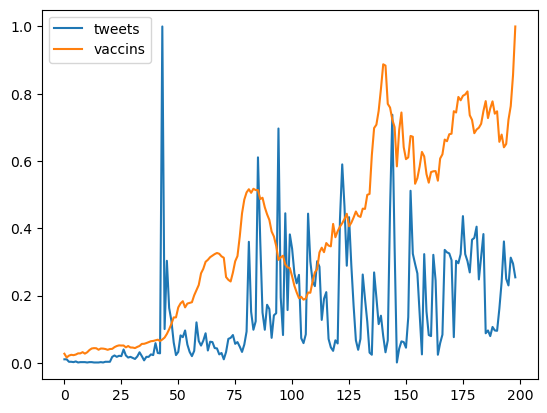

In [344]:
plt.plot(indus_df['tweets']/(indus_df['tweets'].max()), label = 'tweets')
plt.plot(indus_df['daily_vaccinations']/(indus_df['daily_vaccinations'].max()), label = 'vaccins')
plt.legend()

In [350]:
grangercausalitytests(indus_df[['tweets', 'daily_vaccinations' ]],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.7188  , p=0.0214  , df_denom=183, df_num=5
ssr based chi2 test:   chi2=14.4111 , p=0.0132  , df=5
likelihood ratio test: chi2=13.9009 , p=0.0163  , df=5
parameter F test:         F=2.7188  , p=0.0214  , df_denom=183, df_num=5


{5: ({'ssr_ftest': (2.718793436222462, 0.021408544202427167, 183.0, 5),
   'ssr_chi2test': (14.411090891452394, 0.013198559518021385, 5),
   'lrtest': (13.900947517829081, 0.0162510047935239, 5),
   'params_ftest': (2.718793436225913, 0.021408544202287525, 183.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Примем p_value 0.05. Можно сказать, что количество твитов от индусов, влияет на количество вакцинаций индусов

In [351]:
grangercausalitytests(indus_df[['daily_vaccinations', 'tweets']],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.8109  , p=0.1127  , df_denom=183, df_num=5
ssr based chi2 test:   chi2=9.5987  , p=0.0874  , df=5
likelihood ratio test: chi2=9.3687  , p=0.0952  , df=5
parameter F test:         F=1.8109  , p=0.1127  , df_denom=183, df_num=5


{5: ({'ssr_ftest': (1.8108799155807593, 0.11273095762890419, 183.0, 5),
   'ssr_chi2test': (9.598653104444463, 0.087439508067318, 5),
   'lrtest': (9.368746976973853, 0.0952295998342811, 5),
   'params_ftest': (1.8108799155819308, 0.11273095762867365, 183.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Можно сказать, что количество вакцинаций индусов, не влияет на количество твитов о вакцинации от индусов. Точнее у нас недостаточно оснований утверждать обратное

# американцы

In [318]:
tweets_usa = tweets[tweets['user_location'].str.contains('.*usa.*', case=False)]
tweets_usa

,date,id,user_location
38,20201212,1337733927885303808,usa🇺🇸
41,20201212,1337732996380696578,usa🇺🇸
51,20201214,1338631874814619653,india | usa
57,20201214,1338612922600333315,"li, nyc, nj, pa, ne, usa"
79,20201214,1338572466898100224,"new jersey, usa"
...,...,...,...
228085,20211117,1460982803491966978,usa
228089,20211117,1460958950699016199,usa
228120,20211117,1460820743672016903,"fremont, ca, usa"
228127,20211117,1460795411258613765,usa


   выделилось всего 6000 американских тивттов, но там их гораздо больше, просто многие указывают только город и штат. Поэтому попробуем взять данные всех твиттов и оценить их влияние на американцев. И еще отдельно попробуем индусов исключить раз их так много в датасете и тоже оценим.

In [389]:
tweets_world = tweets.groupby(['date']).count()
tweets_world = tweets_world.rename(columns={'id': 'tweets'})
tweets_world

,tweets,user_location
date,,
20201212,63,50
20201213,98,78
20201214,137,112
20201215,150,115
20201216,144,118
...,...,...
20211119,846,541
20211120,765,509
20211121,629,363


In [363]:
vaccins_usa = vaccins[vaccins['location']=='United States' ]

In [366]:
burger_df= pd.merge(tweets_world, vaccins_usa, on='date')
burger_df

,date,tweets,user_location,daily_vaccinations,location
0,20201221,83,83,57909.0,United States
1,20201222,128,128,127432.0,United States
2,20201223,107,107,150606.0,United States
3,20201224,85,85,191001.0,United States
4,20201225,30,30,215238.0,United States
...,...,...,...,...,...
221,20210824,702,702,860114.0,United States
222,20210825,705,705,891838.0,United States
223,20210826,830,830,877756.0,United States
224,20210827,712,712,886314.0,United States


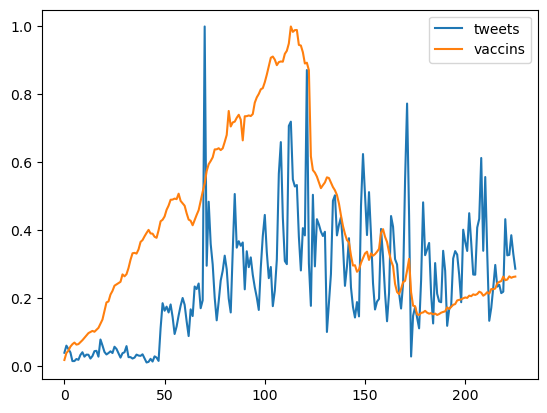

In [393]:
plt.plot(burger_df['tweets']/(burger_df['tweets'].max()), label = 'tweets')
plt.plot(burger_df['daily_vaccinations']/(burger_df['daily_vaccinations'].max()), label = 'vaccins')
plt.legend()

In [395]:
grangercausalitytests(burger_df[['tweets', 'daily_vaccinations' ]],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6116  , p=0.1583  , df_denom=210, df_num=5
ssr based chi2 test:   chi2=8.4800  , p=0.1317  , df=5
likelihood ratio test: chi2=8.3213  , p=0.1394  , df=5
parameter F test:         F=1.6116  , p=0.1583  , df_denom=210, df_num=5


{5: ({'ssr_ftest': (1.6115827741243023, 0.15826933016609393, 210.0, 5),
   'ssr_chi2test': (8.479995073368352, 0.13169121602407943, 5),
   'lrtest': (8.321347641140619, 0.13939222481877206, 5),
   'params_ftest': (1.6115827741216406, 0.1582693301668136, 210.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Можно сказать, что количество твитов о вакцинации в мире, не влияет на количество вакцинаций американцами

In [396]:
grangercausalitytests(burger_df[['daily_vaccinations', 'tweets' ]],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=7.0526  , p=0.0000  , df_denom=210, df_num=5
ssr based chi2 test:   chi2=37.1102 , p=0.0000  , df=5
likelihood ratio test: chi2=34.3045 , p=0.0000  , df=5
parameter F test:         F=7.0526  , p=0.0000  , df_denom=210, df_num=5


{5: ({'ssr_ftest': (7.052620970103484, 4.074572027132965e-06, 210.0, 5),
   'ssr_chi2test': (37.1102198664969, 5.692346435890168e-07, 5),
   'lrtest': (34.304504212390384, 2.0706981201976275e-06, 5),
   'params_ftest': (7.0526209701034785, 4.074572027133018e-06, 210.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Можно сказать, что количество вакцинаций американцев,влияет на количество твитов о вакцинации

Рассмотрим без индусов и без тех, у кого не указана страна

In [402]:
tweets_world_bez_ind= tweets.dropna(subset=['user_location'])
tweets_world_bez_ind = tweets_world_bez_ind[~ tweets_world_bez_ind['user_location'].str.contains('.*india.*', case=False)]
tweets_world_bez_ind = tweets_world_bez_ind.groupby(['date']).count()
tweets_world_bez_ind = tweets_world_bez_ind.rename(columns={'id': 'tweets'})
tweets_world_bez_ind

,tweets,user_location
date,,
20201212,46,46
20201213,70,70
20201214,104,104
20201215,110,110
20201216,110,110
...,...,...
20211119,450,450
20211120,362,362
20211121,289,289


In [403]:
burger_df2= pd.merge(tweets_world_bez_ind, vaccins_usa, on='date')
burger_df2

,date,tweets,user_location,daily_vaccinations,location
0,20201221,78,78,57909.0,United States
1,20201222,109,109,127432.0,United States
2,20201223,106,106,150606.0,United States
3,20201224,81,81,191001.0,United States
4,20201225,27,27,215238.0,United States
...,...,...,...,...,...
221,20210824,463,463,860114.0,United States
222,20210825,485,485,891838.0,United States
223,20210826,531,531,877756.0,United States
224,20210827,430,430,886314.0,United States


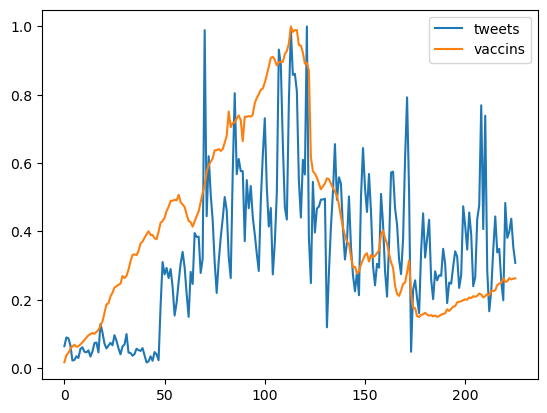

In [404]:
plt.plot(burger_df2['tweets']/(burger_df2['tweets'].max()), label = 'tweets')
plt.plot(burger_df2['daily_vaccinations']/(burger_df2['daily_vaccinations'].max()), label = 'vaccins')
plt.legend()

In [405]:
grangercausalitytests(burger_df2[['tweets', 'daily_vaccinations' ]],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.8632  , p=0.0159  , df_denom=210, df_num=5
ssr based chi2 test:   chi2=15.0658 , p=0.0101  , df=5
likelihood ratio test: chi2=14.5745 , p=0.0123  , df=5
parameter F test:         F=2.8632  , p=0.0159  , df_denom=210, df_num=5


{5: ({'ssr_ftest': (2.863189232119906, 0.01594840202815096, 210.0, 5),
   'ssr_chi2test': (15.065829054726175, 0.010084732880628557, 5),
   'lrtest': (14.574508283946216, 0.012343853835158219, 5),
   'params_ftest': (2.863189232118363, 0.01594840202819819, 210.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Получаем что если удалить индусов, то количество твитов влияет на количество вакцин

In [406]:
grangercausalitytests(burger_df[['daily_vaccinations', 'tweets' ]],maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=7.0526  , p=0.0000  , df_denom=210, df_num=5
ssr based chi2 test:   chi2=37.1102 , p=0.0000  , df=5
likelihood ratio test: chi2=34.3045 , p=0.0000  , df=5
parameter F test:         F=7.0526  , p=0.0000  , df_denom=210, df_num=5


{5: ({'ssr_ftest': (7.052620970103484, 4.074572027132965e-06, 210.0, 5),
   'ssr_chi2test': (37.1102198664969, 5.692346435890168e-07, 5),
   'lrtest': (34.304504212390384, 2.0706981201976275e-06, 5),
   'params_ftest': (7.0526209701034785, 4.074572027133018e-06, 210.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Можно сказать, что количество вакцинаций американцев,влияет на количество твитов о вакцинации